In [15]:
# Linear regression

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [16]:
birds = pd.read_csv("data/birds.csv")
birds

,nVisitsNestling,futureBehavior
0,1,-0.80
1,7,-0.92
2,15,-0.80
3,4,-0.46
4,11,-0.47
5,14,-0.46
6,23,-0.23
7,14,-0.16
8,9,-0.23
9,5,-0.23


In [17]:
birds.head(5)

,nVisitsNestling,futureBehavior
0,1,-0.80
1,7,-0.92
2,15,-0.80
3,4,-0.46
4,11,-0.47


In [18]:
x = birds["nVisitsNestling"]
y = birds["futureBehavior"]

x.head(2)
# y.head(2)

0    1
1    7
Name: nVisitsNestling, dtype: int64

Text(0, 0.5, 'future behaviour')

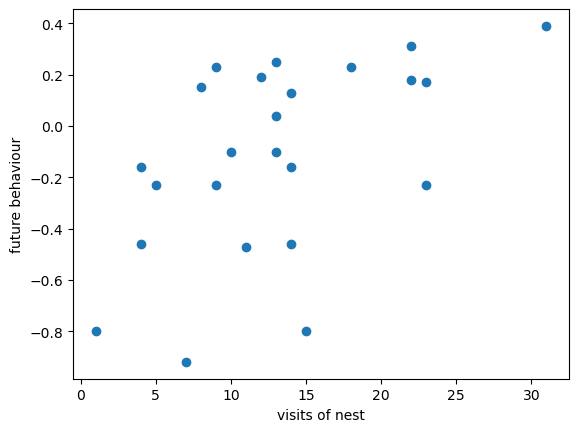

In [21]:
plt.scatter(x, y)
plt.xlabel("visits of nest")
plt.ylabel("future behaviour")

In [22]:
# Custom linear regression model using OLS algorithm

# Step 1: Add a second column of ones to feature (x): [x 1]
x_len = len(x)
print(x_len)

x = np.array(x)
x_train = np.hstack([
    x.reshape(-1, 1), 
    np.ones((x_len, 1), dtype=np.float32)])
print(x_train)
print("----------------------")
print(x_train.shape)

24
[[ 1.  1.]
 [ 7.  1.]
 [15.  1.]
 [ 4.  1.]
 [11.  1.]
 [14.  1.]
 [23.  1.]
 [14.  1.]
 [ 9.  1.]
 [ 5.  1.]
 [ 4.  1.]
 [10.  1.]
 [13.  1.]
 [13.  1.]
 [14.  1.]
 [12.  1.]
 [13.  1.]
 [ 9.  1.]
 [ 8.  1.]
 [18.  1.]
 [22.  1.]
 [22.  1.]
 [23.  1.]
 [31.  1.]]
----------------------
(24, 2)


In [37]:
# Step 2: Compute x_train^T * x_train
x_train_x = np.dot(x_train.T, x_train)
print("step 2")
print(x_train_x)

# Step 3: Compute x_train^T * y_train [reshape y_train to column vector]
y_train = np.array(y)
y_train = y_train.reshape(-1,1)
# print(y_train.shape, x_train.T.shape)

x_train_y_train = np.dot(x_train.T, y_train)
print("step 3")
print(x_train_y_train)
print(x_train_y_train.shape)

# Step 4: Compute the weight matrix, w
x_train_x_inv = np.linalg.inv((x_train_x))
w = np.dot(x_train_x_inv, x_train_y_train)
print("step 4: computed weights")
print(w)

step 2
[[5329.  315.]
 [ 315.   24.]]
step 3
[[-4.32]
 [-2.85]]
(2, 1)
step 4: computed weights
[[ 0.02769593]
 [-0.48225908]]


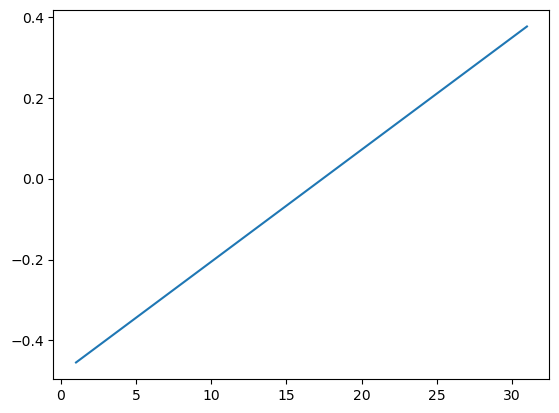

In [38]:
# w[0], w[-1] = mx, intercept
x_hat = np.linspace(np.min(x), np.max(x),  100)
y_hat = (w[0] * x_hat) + w[1]

plt.plot(x_hat, y_hat)

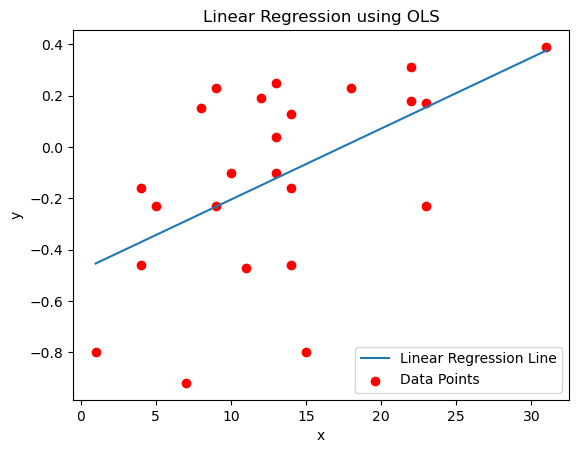

In [39]:
# Final step
# Plotting the regression line
plt.plot(x_hat, y_hat, label="Linear Regression Line")
plt.scatter(x, y, color='red', label="Data Points")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression using OLS')
plt.legend()
plt.show()

24
[[ 1.  1.]
 [ 7.  1.]
 [15.  1.]
 [ 4.  1.]
 [11.  1.]
 [14.  1.]
 [23.  1.]
 [14.  1.]
 [ 9.  1.]
 [ 5.  1.]
 [ 4.  1.]
 [10.  1.]
 [13.  1.]
 [13.  1.]
 [14.  1.]
 [12.  1.]
 [13.  1.]
 [ 9.  1.]
 [ 8.  1.]
 [18.  1.]
 [22.  1.]
 [22.  1.]
 [23.  1.]
 [31.  1.]]
----------------------
(24, 2)
step 2
[[5329.  315.]
 [ 315.   24.]]
step 3
[[-4.32]
 [-2.85]]
(2, 1)
step 4: computed weights
[[ 0.02769593]
 [-0.48225908]]


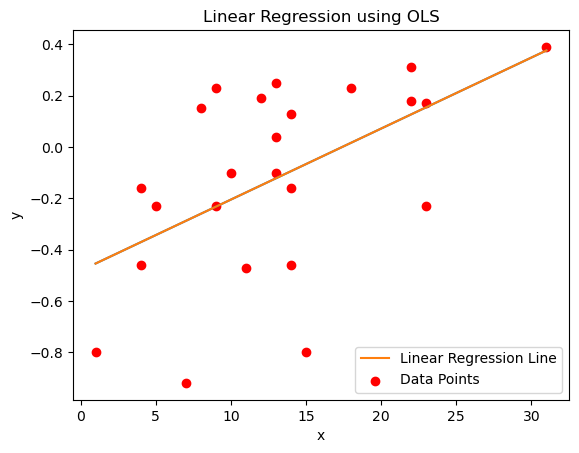

In [ ]:
# # Custom linear regression model using OLS algorithm

# # Step 1: Add a second column of ones to feature (x): [x 1]
# x_len = len(x)
# print(x_len)

# x = np.array(x)
# x_train = np.hstack([
#     x.reshape(-1, 1), 
#     np.ones((x_len, 1), dtype=np.float32)])
# print(x_train)
# print("----------------------")
# print(x_train.shape)

# # Step 2: Compute x_train^T * x_train
# x_train_x = np.dot(x_train.T, x_train)
# print("step 2")
# print(x_train_x)

# # Step 3: Compute x_train^T * y_train [reshape y_train to column vector]
# y_train = np.array(y)
# y_train = y_train.reshape(-1,1)
# # print(y_train.shape, x_train.T.shape)

# x_train_y_train = np.dot(x_train.T, y_train)
# print("step 3")
# print(x_train_y_train)
# print(x_train_y_train.shape)

# # Step 4: Compute the weight matrix, w
# x_train_x_inv = np.linalg.inv((x_train_x))
# w = np.dot(x_train_x_inv, x_train_y_train)
# print("step 4: computed weights")
# print(w)

# # w[0], w[-1] = slope, intercept
# x_hat = np.linspace(np.min(x), np.max(x),  100)
# y_hat = w[0] * x_hat + w[1]

# plt.plot(x_hat, y_hat)
# # Final step
# # Plotting the regression line
# plt.plot(x_hat, y_hat, label="Linear Regression Line")
# plt.scatter(x, y, color='red', label="Data Points")
# plt.xlabel('x')
# plt.ylabel('y')
# plt.title('Linear Regression using OLS')
# plt.legend()
# plt.show()

In [44]:
# Data set 2: Using salary data

import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from pandas.core.common import random_state
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [46]:
salary_data = pd.read_csv("data/salary_data.csv")
salary_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [47]:
salary_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


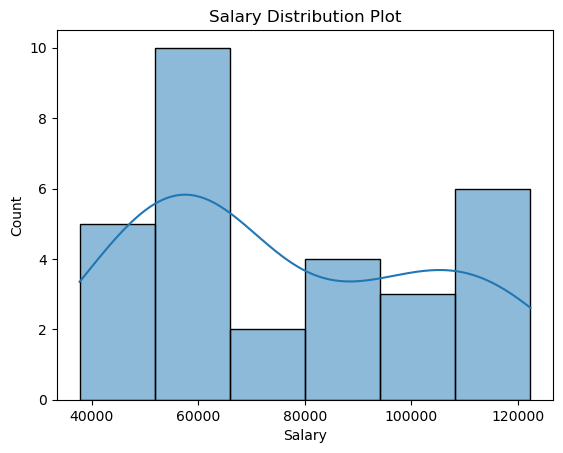

In [52]:
plt.title("Salary Distribution Plot")
sns.histplot(salary_data["Salary"], kde=True)
plt.show()

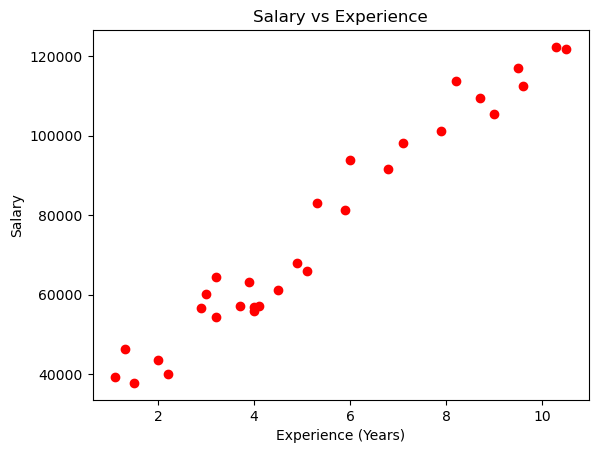

In [54]:
# How salary varies with experience
plt.scatter(salary_data["YearsExperience"],
            salary_data["Salary"],
            color="red")
plt.title("Salary vs Experience")
plt.xlabel("Experience (Years)")
plt.ylabel("Salary")
plt.show()

In [58]:
# Test and Train dataset
x = salary_data.iloc[:, :1]
y = salary_data.iloc[:, 1:]

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    random_state=0)

In [59]:
# Using sklearn regression model
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [60]:
# Results prediction with the model
y_pred_test = regressor.predict(x_test)
y_pred_train = regressor.predict(x_train)

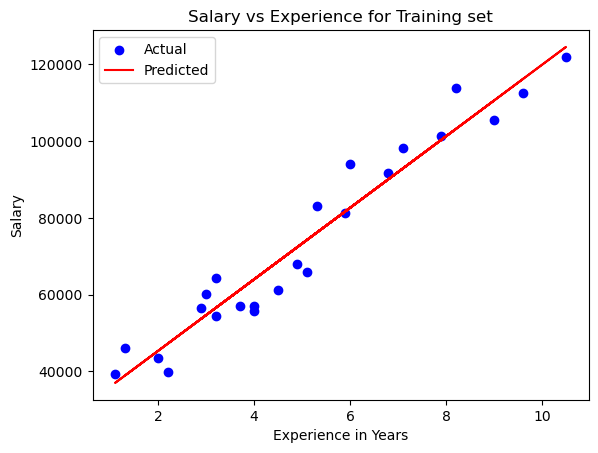

In [64]:
# Plot results based on the training set
plt.scatter(x_train, y_train, color="blue")
plt.plot(x_train, y_pred_train, color="red")
plt.title("Salary vs Experience for Training set")
plt.xlabel("Experience in Years")
plt.ylabel("Salary")
plt.legend(["Actual", "Predicted"])
plt.show()

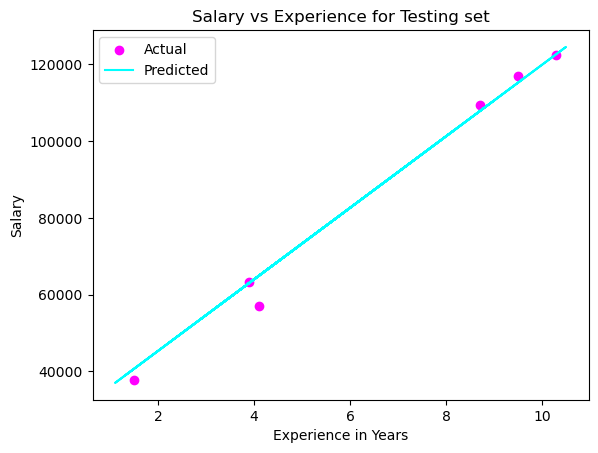

In [65]:
# Plot results based on the testing set
plt.scatter(x_test, y_test, color="magenta")
plt.plot(x_train, y_pred_train, color="cyan")
plt.title("Salary vs Experience for Testing set")
plt.xlabel("Experience in Years")
plt.ylabel("Salary")
plt.legend(["Actual", "Predicted"])
plt.show()

In [66]:
# Equation of the regression line
slope = regressor.coef_
intercept = regressor.intercept_

print(slope, intercept)

[[9312.57512673]] [26780.09915063]


In [ ]:
# General steps using sklearn regression models

import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from pandas.core.common import random_state
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

salary_data = pd.read_csv("data/salary_data.csv")
salary_data.head()
salary_data.describe()

# How salary varies with experience
plt.scatter(salary_data["YearsExperience"],
            salary_data["Salary"],
            color="red")
plt.title("Salary vs Experience")
plt.xlabel("Experience (Years)")
plt.ylabel("Salary")
plt.show()

# Test and Train dataset
x = salary_data.iloc[:, :1]
y = salary_data.iloc[:, 1:]

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    random_state=0)

# Using sklearn regression model
regressor = LinearRegression()
regressor.fit(x_train, y_train)

# Results prediction with the model
y_pred_test = regressor.predict(x_test)
y_pred_train = regressor.predict(x_train)

# Plot results based on the training set
plt.scatter(x_train, y_train, color="blue")
plt.plot(x_train, y_pred_train, color="red")
plt.title("Salary vs Experience for Training set")
plt.xlabel("Experience in Years")
plt.ylabel("Salary")
plt.legend(["Actual", "Predicted"])
plt.show()

# Plot results based on the testing set
plt.scatter(x_test, y_test, color="magenta")
plt.plot(x_train, y_pred_train, color="cyan")
plt.title("Salary vs Experience for Testing set")
plt.xlabel("Experience in Years")
plt.ylabel("Salary")
plt.legend(["Actual", "Predicted"])
plt.show()

# Equation of the regression line
slope = regressor.coef_
intercept = regressor.intercept_

print(slope, intercept)